<a href="https://colab.research.google.com/github/MinwooKim1990/Music/blob/main/sound%20_edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pydub 
import numpy as np

def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

sr, x = read('/content/second.mp3')
print(x)
print(sr)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
44100


14281344


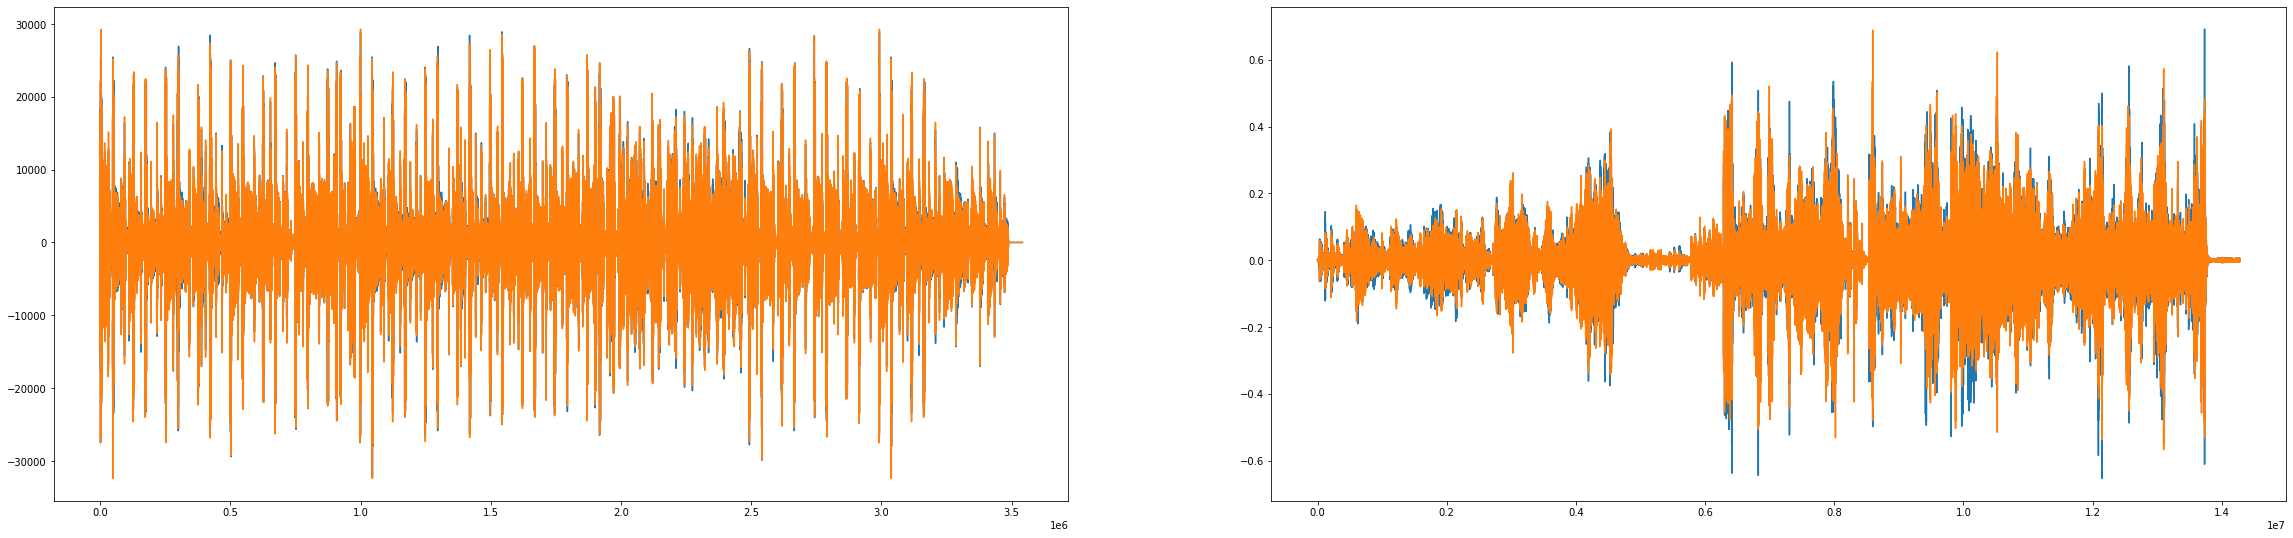

In [19]:
import matplotlib.pyplot as plt
srn, xn=read('/content/tarantella.mp3',True)
print(len(xn))
plt.figure(figsize=(40, 20))
plt.subplot(2, 2, 1)
plt.plot(x)
plt.subplot(2, 2, 2)
plt.plot(xn)

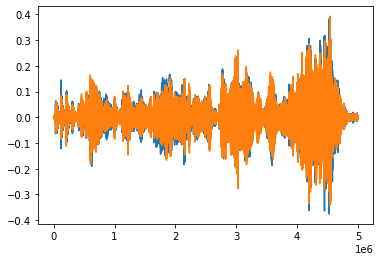

In [30]:
xs=xn[:5*10**6]
plt.plot(xs)

In [35]:
write('1.mp3',srn, xs, True)